In [1]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
import matplotlib as mpl
import seaborn as sns
from  matplotlib_venn import venn2
%matplotlib inline

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Cold-shock

In [3]:
new_csv = open('xtail_cold_fixed.csv', 'w')
with open('xtail_cold.csv','r') as f:
    for line in f:
        linelist = line.split(',')
        if len(linelist) > 9:
            continue
        new_csv.write(line)
new_csv.close()

In [4]:
xtail_cold_df = pd.read_csv('xtail_cold_fixed.csv')
xtail_cold_df.rename(columns={'Unnamed: 0': 'gene'}, inplace=True)
xtail_cold_df

,gene,log2FC_TE_v1,pvalue_v1,log2FC_TE_v2,pvalue_v2,log2FC_TE_final,pvalue_final,pvalue.adjust
0,aaaD,-2.589307,0.115990,-2.222439,0.158848,-2.222439,0.158848,0.400794
1,aaaE,-0.684118,0.571297,-0.638620,0.617111,-0.638620,0.617111,0.818783
2,aaeA,-1.692637,0.212166,-1.586707,0.260398,-1.586707,0.260398,0.522101
3,aaeB,1.381524,0.331134,1.434550,0.129214,1.381524,0.331134,0.595753
4,aaeR,-1.916454,0.017815,-1.927067,0.016932,-1.916454,0.017815,0.099133
5,aaeX,-3.674106,0.125963,-3.911591,0.122340,-3.674106,0.125963,0.348924
6,aas,0.318520,0.646829,0.325727,0.682222,0.325727,0.682222,0.857407
7,aat,0.506134,0.615373,0.527492,0.578413,0.506134,0.615373,0.818777
8,abgA,2.350475,0.147366,2.436712,0.066272,2.350475,0.147366,0.381727
9,abgB,0.705569,0.593911,0.721900,0.482304,0.705569,0.593911,0.807461


In [5]:
xtail_cold_df['1/log2FC_TE_final']=(-1*xtail_cold_df['log2FC_TE_final'])
xtail_cold_df['-log10pvalue_final']=(1.0/xtail_cold_df['pvalue_final']).apply(np.log10).replace([np.inf,-np.inf],np.nan)                 
xtail_cold_df['-log10pvalue.adjust']=(1.0/xtail_cold_df['pvalue.adjust']).apply(np.log10).replace([np.inf,-np.inf],np.nan)                 

high_fc = xtail_cold_df['1/log2FC_TE_final'] > 3
lowP = xtail_cold_df['-log10pvalue.adjust'] > 2

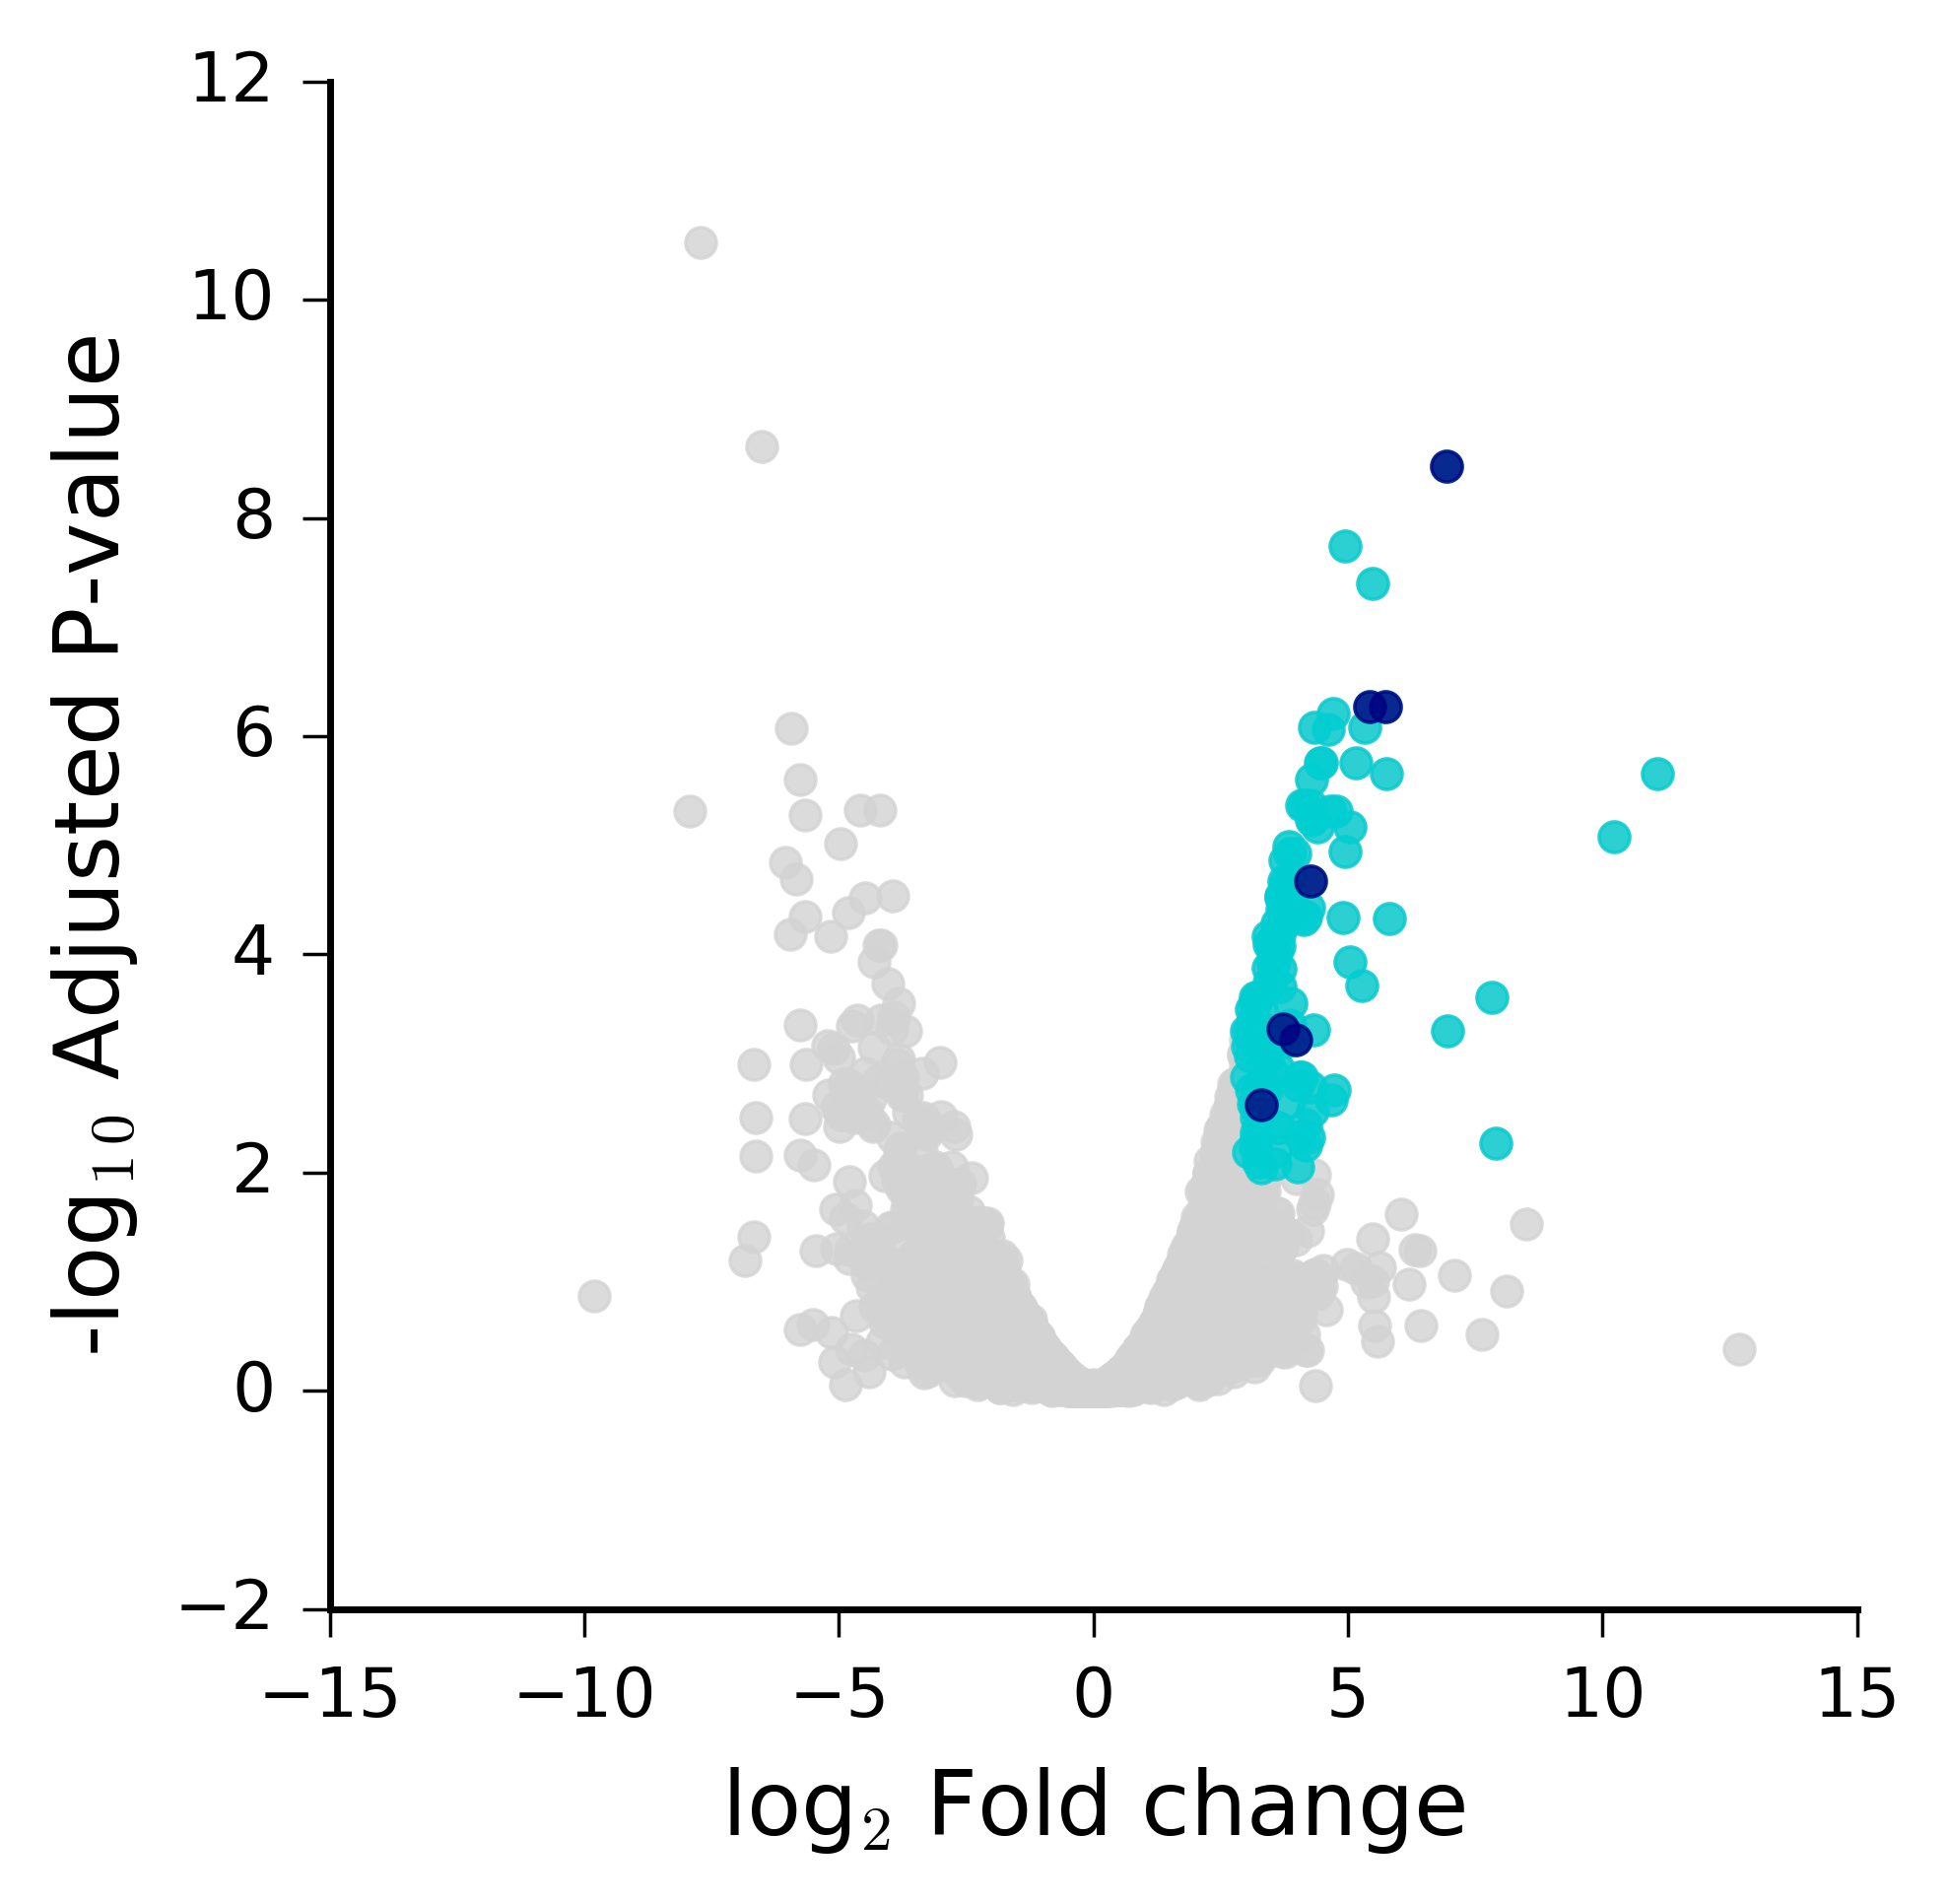

In [12]:
fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 4) 

CSPs = ['cspA','cspB','cspC','cspE','cspF','cspG','cspH']
csps = xtail_cold_df['gene'].isin(CSPs)

ax = sns.regplot(x=xtail_cold_df['1/log2FC_TE_final'],
                 y=xtail_cold_df['-log10pvalue.adjust'],
                 fit_reg=False,
                 color='lightgrey')      
ax = sns.regplot(x=xtail_cold_df[high_fc & lowP]['1/log2FC_TE_final'],
                 y=xtail_cold_df[high_fc & lowP]['-log10pvalue.adjust'],
                 fit_reg=False,
                 color='darkturquoise')  
ax = sns.regplot(x=xtail_cold_df[csps]['1/log2FC_TE_final'],
                 y=xtail_cold_df[csps]['-log10pvalue.adjust'],
                 fit_reg=False,
                 color='navy')  

plt.xlabel('log'+'$_2$'+' Fold change', fontsize=13)
plt.ylabel('-log'+'$_1$'+'$_0$'+' Adjusted P-value', fontsize=13)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

#plt.savefig('valcano_cold.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)

# Stationary phase

In [7]:
new_csv = open('xtail_stationary_fixed.csv', 'w')
with open('xtail_stationary.csv','r') as f:
    for line in f:
        linelist = line.split(',')
        if len(linelist) > 9:
            continue
        new_csv.write(line)
new_csv.close()

In [8]:
xtail_station_df = pd.read_csv('xtail_stationary_fixed.csv')
xtail_station_df.rename(columns={'Unnamed: 0': 'gene'}, inplace=True)
xtail_station_df

,gene,log2FC_TE_v1,pvalue_v1,log2FC_TE_v2,pvalue_v2,log2FC_TE_final,pvalue_final,pvalue.adjust
0,aaaD,-3.575741,0.053215,-2.580115,0.087497,-2.580115,0.087497,0.230308
1,aaaE,-1.876844,0.282577,-2.057134,0.191347,-1.876844,0.282577,0.500452
2,aaeA,-0.517123,0.737660,0.582303,0.686702,-0.517123,0.737660,0.873745
3,aaeB,0.475845,0.671676,0.478085,0.588503,0.475845,0.671676,0.832506
4,aaeR,-0.905563,0.340041,-0.950205,0.278372,-0.905563,0.340041,0.563280
5,aas,2.296568,0.009688,2.235209,0.012338,2.235209,0.012338,0.056715
6,aat,-1.079254,0.221752,-1.047206,0.251310,-1.047206,0.251310,0.466196
7,abgA,1.441706,0.224794,1.515380,0.179417,1.441706,0.224794,0.433804
8,abgB,0.216143,0.820535,0.213140,0.785964,0.216143,0.820535,0.923644
9,abgR,0.428303,0.669448,0.374249,0.678587,0.374249,0.678587,0.837201


In [9]:
xtail_station_df['1/log2FC_TE_final']=(-1*xtail_station_df['log2FC_TE_final'])
xtail_station_df['-log10pvalue_final']=(1.0/xtail_station_df['pvalue_final']).apply(np.log10).replace([np.inf,-np.inf],np.nan)                 
xtail_station_df['-log10pvalue.adjust']=(1.0/xtail_station_df['pvalue.adjust']).apply(np.log10).replace([np.inf,-np.inf],np.nan)                 

high_fc_station = xtail_station_df['1/log2FC_TE_final'] > 3
lowP_station = xtail_station_df['-log10pvalue.adjust'] > 2

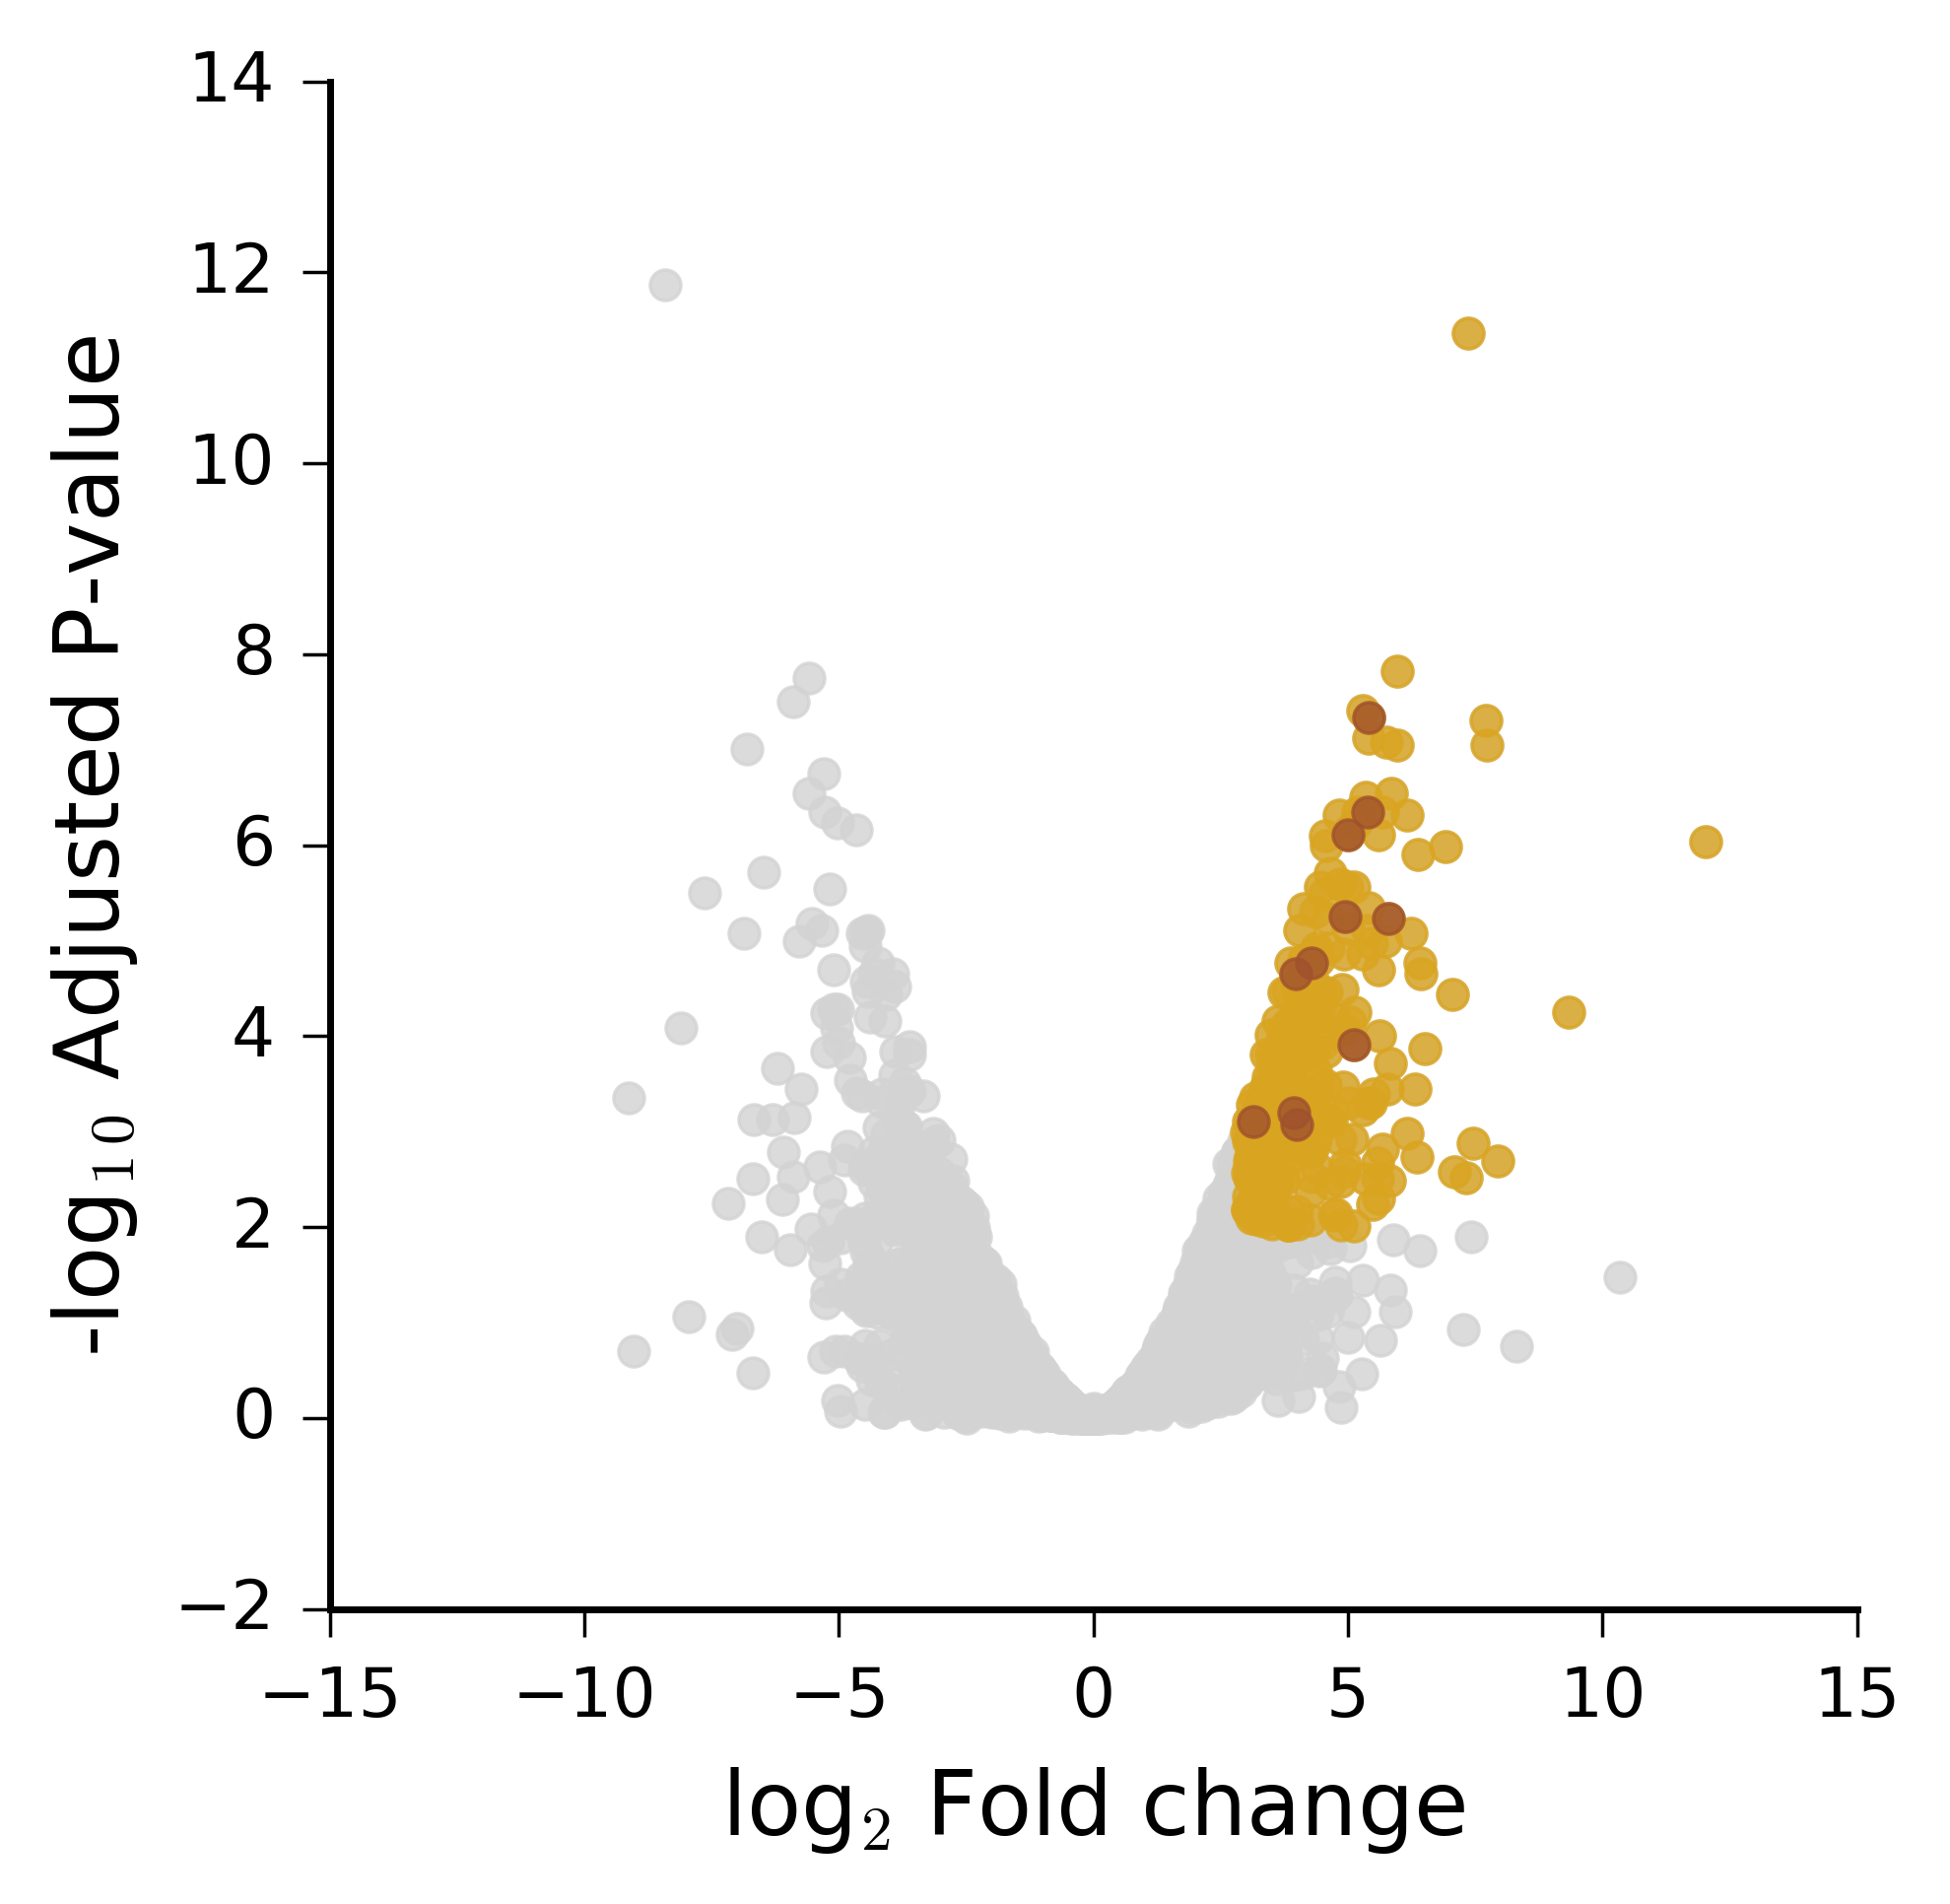

In [11]:
fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 4) 

ribosome_related = ['raiA','hpf','sra']
osm_related = ['osmB','osmE','osmY']
chaperone_related = ['hscB','dnaQ','surA','hdeA','hdeB']
station_list = ribosome_related+osm_related+chaperone_related
station_genes = xtail_station_df['gene'].isin(station_list)

ax = sns.regplot(x=xtail_station_df['1/log2FC_TE_final'],
                 y=xtail_station_df['-log10pvalue.adjust'],
                 fit_reg=False,
                 color='lightgrey')      
ax = sns.regplot(x=xtail_station_df[high_fc_station & lowP_station]['1/log2FC_TE_final'],
                 y=xtail_station_df[high_fc_station & lowP_station]['-log10pvalue.adjust'],
                 fit_reg=False,
                 color='goldenrod')   
ax = sns.regplot(x=xtail_station_df[station_genes]['1/log2FC_TE_final'],
                 y=xtail_station_df[station_genes]['-log10pvalue.adjust'],
                 fit_reg=False,
                 color='sienna')   

plt.xlabel('log'+'$_2$'+' Fold change', fontsize=13)
plt.ylabel('-log'+'$_1$'+'$_0$'+' Adjusted P-value', fontsize=13)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

#plt.savefig('valcano_optVSstation.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)